In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', nrows = 3).T
data

,0,1,2
DateId,20150703,20150703,20150703
MemberId,1388133,1388133,1388133
OrderGroupCode,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...
TrackSourceTypeDef,Web,Web,Web
TrackDeviceTypeDef,Mobile,Mobile,Mobile
PayProfileTypeDef,SevenEleven,SevenEleven,SevenEleven
SalesOrderSlaveId,4457777,4457778,4457779
SalePageId,1242871,1242880,1242880
IsMajor,True,True,True
IsGift,False,False,False


In [3]:
data = pd.read_csv('../../NTU_大數據與商業分析Datasets/Orders.csv', index_col = False, 
                  usecols = ['DateId', 'Quantity'])[['DateId', 'Quantity']]
data.head()

,DateId,Quantity
0,20150703,1
1,20150703,1
2,20150703,1
3,20150703,1
4,20150703,1


In [4]:
data['DateId'] = pd.to_datetime(data['DateId'].astype('str'), format = '%Y%m%d')
data.head()

,DateId,Quantity
0,2015-07-03,1
1,2015-07-03,1
2,2015-07-03,1
3,2015-07-03,1
4,2015-07-03,1


In [5]:
data['Week'] = data['DateId'].apply(lambda x: x.weekday())
data.head()

,DateId,Quantity,Week
0,2015-07-03,1,4
1,2015-07-03,1,4
2,2015-07-03,1,4
3,2015-07-03,1,4
4,2015-07-03,1,4


In [6]:
data['Week'].unique()

array([4, 0, 2, 6, 5, 3, 1])

In [7]:
data['Week'].replace(0, 7, inplace = True)
data['Week'].unique()

array([4, 7, 2, 6, 5, 3, 1])

In [8]:
group = data.groupby('Week')['Quantity'].sum()
group

Week
1    827454
2    836489
3    773765
4    743191
5    817931
6    859920
7    750079
Name: Quantity, dtype: int64

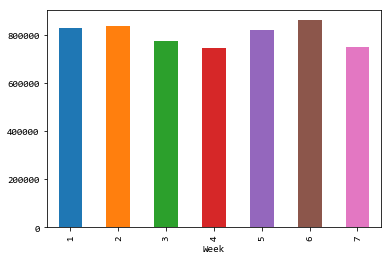

In [9]:
group.plot.bar()